# Simple Linear Regression

### Importing Packages

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [302]:
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Importing Dataset

In [303]:
# Set the number of data points
num_points = 1000

# Generate the x-values for the data points
x = np.random.normal(0, 1, num_points)
y = np.random.normal(0, 1, num_points)

In [304]:
# Combine the x and y values into a single dataset
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,0.085185,0.037661
1,-1.160865,-0.325312
2,-0.595795,1.238148
3,1.001380,-1.281325
4,1.194701,-0.109482
...,...,...
995,-0.226458,0.008276
996,-0.487822,0.052241
997,0.226334,1.275755
998,-1.231352,-0.769438


#### Data Anaysis

In [305]:
print(f"Number of records : {df.shape[0]}")
print(f"Number of column : {df.shape[1]}")

Number of records : 1000
Number of column : 2


In [306]:
print(f'Maximum X value is : {df.x.max()}')
print(f'Minimum X value is : {df.x.min()}\n')
print(f'Maximum Y value is : {df.y.max()}')
print(f'Minimum Y value is : {df.y.min()}')

Maximum X value is : 3.11711786130092
Minimum X value is : -3.838118839676877

Maximum Y value is : 2.8419164298924575
Minimum Y value is : -3.0884510498968862


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [308]:
df.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.018568,0.025281
std,0.949427,0.992204
min,-3.838119,-3.088451
25%,-0.679233,-0.667614
50%,-0.014554,0.038509
75%,0.608074,0.655636
max,3.117118,2.841916


<AxesSubplot:>

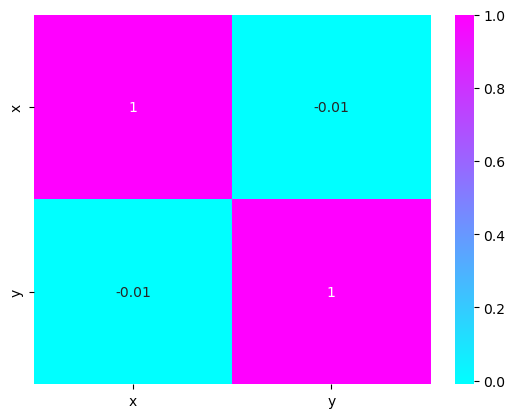

In [309]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

Text(0.5, 1.0, 'Distribution of y Axis')

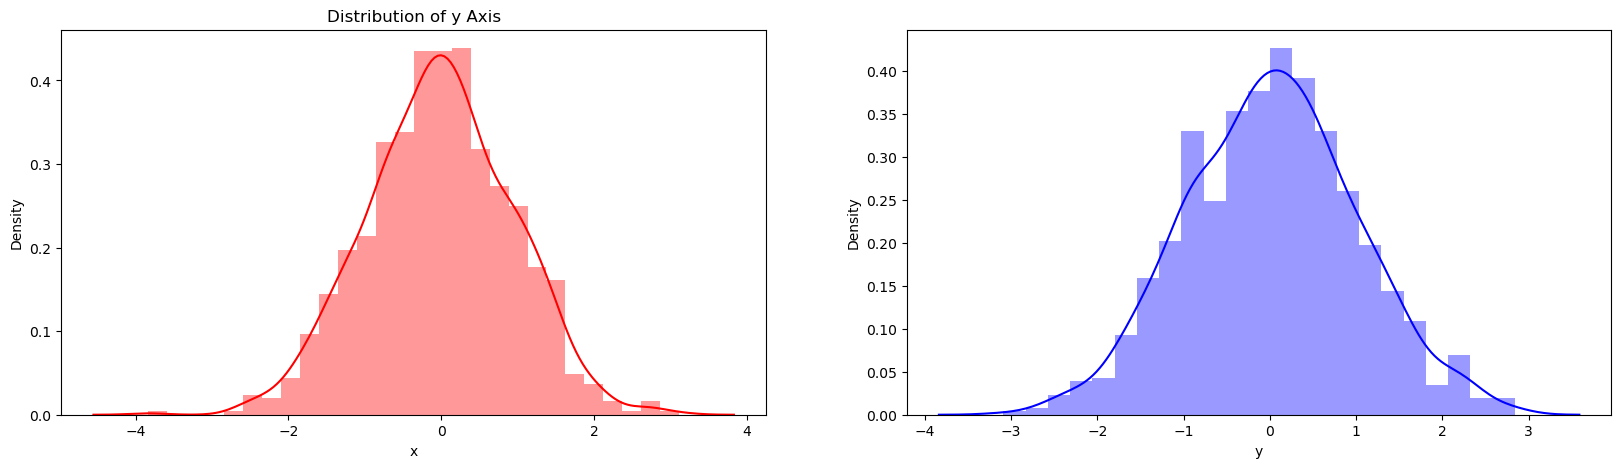

In [310]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df['x'],color='r',ax=ax1)
ax1.set_title('Distribution of X Axis')
sns.distplot(df['y'],color='b',ax=ax2)
ax1.set_title('Distribution of y Axis')

### Train Test Split

In [311]:
shuffle = df.sample(frac=1)
train_size = int(0.7* len(df))
train = shuffle[:train_size]
test = shuffle[train_size:]

In [312]:
print(f"Shape of training data: {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of training data: (700, 2)
Shape of test data : (300, 2)


In [313]:
x_train = train['x']
y_train = train['y']
x_test  = train['x']
y_test  = train['y']

# Simple Linear Regression
### y = m * x + c
#### m = slope
#### c = intercept

### Simple Linear Model

In [314]:
def SimpleRegressionModel(x_train,y_train):
    N = len(x_train)
    numerator = 0
    denominator = 0
    
    x_mean = x_train.mean()
    y_mean = y_train.mean()
    
    s_yixi   = (y_train * x_train).sum()
    yixi_Byn = (y_train.sum() * x_train.sum())/N
    
    s_xixi = (x_train * x_train).sum()
    xixi_Byn = (x_train.sum() * x_train.sum())/N
    
    slope = (s_yixi - yixi_Byn)/(s_xixi - xixi_Byn)
    
    intercept = y_mean - (slope * x_mean)
    
    return (slope,intercept)

In [315]:
m,c = SimpleRegressionModel(x_train,y_train)
print (f'm = {m} \nc = {c}')
print(f"Equation of Best Fit :\n y = {m} * x + {c}")

m = -0.0202950216735463 
c = 0.01983285128888848
Equation of Best Fit :
 y = -0.0202950216735463 * x + 0.01983285128888848


Text(0, 0.5, 'Y')

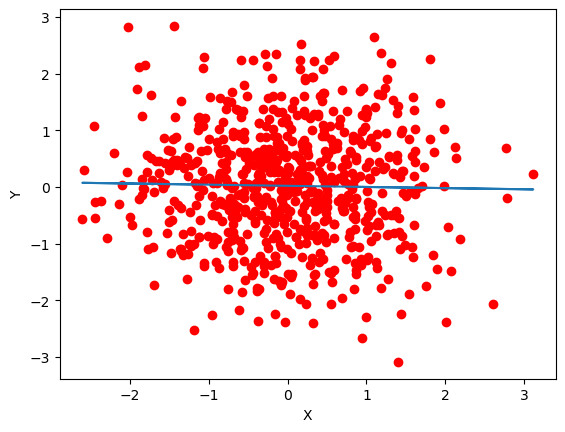

In [316]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,m*x_train+c)
plt.xlabel('X')
plt.ylabel('Y')

In [317]:
def prediction(x_train,slope,intercept):
    predict = x_train * slope + intercept
    return predict

In [318]:
y_pred = prediction(x_test,m,c)

In [319]:
from sklearn.metrics import mean_squared_error
slr = mean_squared_error(y_pred,y_test)
print(slr)

1.0092282150947312


## Gradient Descent

In [320]:
class GradientDescent:
    def __init__(self,lr=0.001,epochs=500):
        self.lr,self.epochs=lr,epochs
    def fit(self,x,y):
        m=5
        c=0
        n=x.shape[0]
        for i in range(self.epochs):
            y_pred=m*x+c
            m_gradient=(-2/n)*(np.sum(x*(y-y_pred)))
            c_gradient=(-2/n)*(np.sum(y-y_pred))
            m=m-(self.lr*m_gradient)
            c=c+(self.lr*c_gradient)
        self.m,self.c=m,c
    def predict(self,x):
        y=self.m*x+self.c
        return y

In [321]:
lr =GradientDescent()
lr.fit(x,y)
y_pred=lr.predict(x)

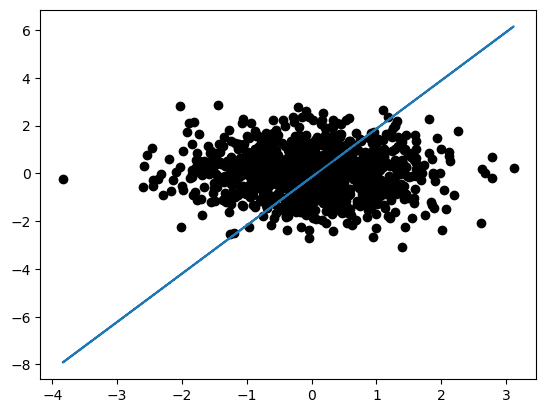

In [322]:
plt.scatter(x,y,c='black')
plt.plot(x,y_pred)

### Mean Absolute Error and Mean Absolute Percentage Error

In [323]:
from sklearn.metrics import mean_squared_error
gb = mean_squared_error(y_pred,y)
print(gb)

4.751136481544856


## SK Learn Model

In [324]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [325]:
reg = LinearRegression()

In [326]:
reg.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [327]:
y_pred = reg.predict(x_test.reshape(-1, 1))

In [328]:
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Slope:  [-0.01067921]
Intercept:  0.01884639897025092


In [329]:
print(f"Equation of Best Fit :\n y = {m} * x + {c}")

Equation of Best Fit :
 y = -0.0202950216735463 * x + 0.01983285128888848


In [330]:
from sklearn.metrics import mean_squared_error
sk = mean_squared_error(y_pred,y_test)
print(sk)

1.0520202710326076


### Model Evaluation 

In [331]:
m_per_dict = {'Simple Linear regression model':slr,"Gradient Descent Model":gb,"sk-learn model":sk}
model_performance = pd.DataFrame(m_per_dict,index=['mean_squared_error'])
model_performance

,Simple Linear regression model,Gradient Descent Model,sk-learn model
mean_squared_error,1.009228,4.751136,1.05202


#### From this output we can say that our model is works the best for sk-learn model and the least worst for gradient decent model